In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.extmath import randomized_svd as rSVD

In [2]:
eze = plt.imread("eze.png")
eze_gs = sum(eze[:, :, ch] for ch in range(3) ) /3

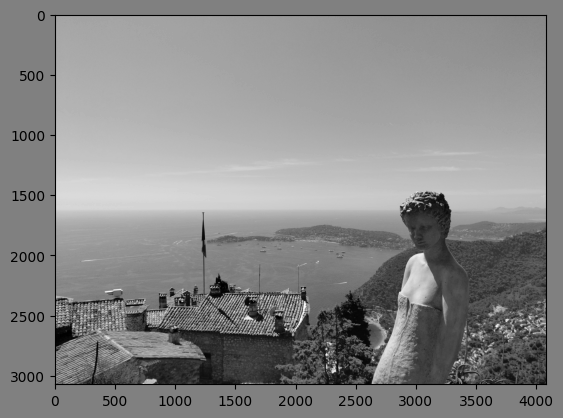

In [3]:
fig, ax = plt.subplots()
ax = plt.imshow(eze_gs, cmap='gray')
fig.set(facecolor = "grey")
plt.show()

In [7]:
def p_percent_approx(matrix, p, step=10):
    A = matrix.copy()
    sigma_sum = 0
    sigmas_pred = 1
    n = min(matrix.shape)
    k = 0
    result = np.zeros_like(matrix)


    U, S, VT = rSVD(A.copy(), n//3)
    k += n//3
    sigma_sum += sum(S)
    sigmas_pred = sigma_sum + min(S) * (n-k)
    approx = np.dot(U,np.dot(np.diag(S),VT))
    result += approx
    A -= approx
    print(n)
    while (sigma_sum / sigmas_pred) < p:
        #print("accuracy pred:", sigma_sum / sigmas_pred)
        print('-', end='')
        U, S, VT = rSVD(A.copy(), step)
        k += step
        sigma_sum += sum(S)
        sigmas_pred = sigma_sum + min(S) * (n-k)
        approx = np.dot(U,np.dot(np.diag(S),VT))
        result += approx
        A -= approx
    print()
    print("result accuracy pred:", sigma_sum / sigmas_pred)
    return result

In [8]:
reconst = p_percent_approx(eze_gs, 0.99, 1000)

C:\Users\user2\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\utils\extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


3072
--
result accuracy pred: 0.9998162383412166


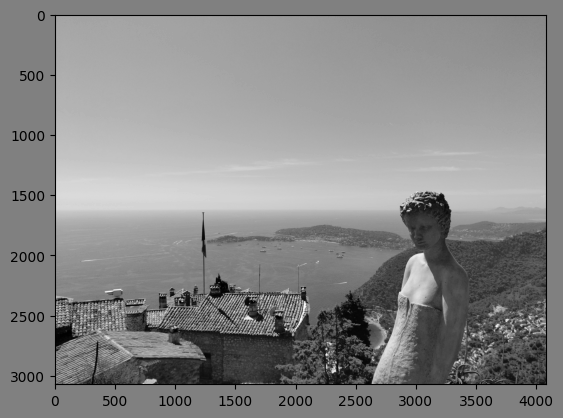

In [6]:
fig, ax = plt.subplots()
ax = plt.imshow(reconst, cmap='gray')
fig.set(facecolor = "grey")
plt.show()